# 4IM01 - Skin Lesions - Giordmaina - Bonninière

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import cv2
from otsu_seg import otsu

## Tests on the first implementation of Otsu segmentation method

In [2]:
im1 = cv2.imread ("images_test/img1.jpg")
im2 = cv2.imread ("images_test/img2.jpg")
im3 = cv2.imread ("images_test/img3.jpg")
im4 = cv2.imread ("images_test/img4.jpg")
im5 = cv2.imread ("images_test/img5.jpg")
im6 = cv2.imread ("images_test/img6.jpg")
im7 = cv2.imread ("images_test/img7.jpg")
im8 = cv2.imread ("images_test/img8.jpg")
im9 = cv2.imread ("images_test/img9.jpg")
im10 = cv2.imread ("images_test/img10.jpg")

In [3]:
im_gray1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
im_gray2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)
im_gray3 = cv2.cvtColor(im3, cv2.COLOR_BGR2GRAY)
im_gray4 = cv2.cvtColor(im4, cv2.COLOR_BGR2GRAY)
im_gray5 = cv2.cvtColor(im5, cv2.COLOR_BGR2GRAY)
im_gray6 = cv2.cvtColor(im6, cv2.COLOR_BGR2GRAY)
im_gray7 = cv2.cvtColor(im7, cv2.COLOR_BGR2GRAY)
im_gray8 = cv2.cvtColor(im8, cv2.COLOR_BGR2GRAY)
im_gray9 = cv2.cvtColor(im9, cv2.COLOR_BGR2GRAY)
im_gray10 = cv2.cvtColor(im10, cv2.COLOR_BGR2GRAY)

In [4]:
def viewimg(img1, img2): #WARNING: img1 and img2 must be in grayscale otherwise diffferent size of dimensions
    # convert to RGB for matplotlib, not the same convention as OpenCV
    img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB) if len(img1.shape) == 3 else img1
    img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB) if len(img2.shape) == 3 else img2
    
    # Resize img2 if different size
    if img1.shape != img2.shape:
        img2_rgb = cv2.resize(img2_rgb, (img1.shape[1], img1.shape[0]))
    
    # concatenate the two images
    img_conc = np.hstack((img1_rgb, img2_rgb))
    
    # Plot the images
    plt.imshow(img_conc, cmap='gray' if len(img_conc.shape) == 2 else None)
    plt.axis('off')  # Masquer les axes
    plt.show()

In [5]:
t1 = otsu(im_gray1)
t2 = otsu(im_gray2)
t3 = otsu(im_gray3)
t4 = otsu(im_gray4)
t5 = otsu(im_gray5)
t6 = otsu(im_gray6)
t7 = otsu(im_gray7)
t8 = otsu(im_gray8)
t9 = otsu(im_gray9)
t10 = otsu(im_gray10)

print("Threshold for image 1: ", t1)
print("Threshold for image 2: ", t2)
print("Threshold for image 3: ", t3)
print("Threshold for image 4: ", t4)
print("Threshold for image 5: ", t5)
print("Threshold for image 6: ", t6)
print("Threshold for image 7: ", t7)
print("Threshold for image 8: ", t8)
print("Threshold for image 9: ", t9)
print("Threshold for image 10: ", t10)

/Users/louis/Documents/Telecom/2A/IMA/ProjIMA/4im01-skinlesions-giordmainabonniniere/otsu_seg.py:69: RuntimeWarning: invalid value encountered in double_scalars
  return mu/w
/Users/louis/Documents/Telecom/2A/IMA/ProjIMA/4im01-skinlesions-giordmainabonniniere/otsu_seg.py:74: RuntimeWarning: invalid value encountered in double_scalars
  return mu/w


Threshold for image 1:  116
Threshold for image 2:  145
Threshold for image 3:  142
Threshold for image 4:  120
Threshold for image 5:  141
Threshold for image 6:  139
Threshold for image 7:  142
Threshold for image 8:  149
Threshold for image 9:  136
Threshold for image 10:  109


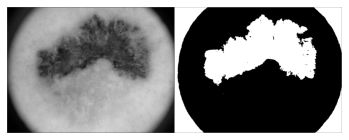

In [6]:
ret1, mask1 = cv2.threshold(im_gray1, t1, 255, cv2.THRESH_BINARY_INV)
viewimg(im_gray1, mask1)

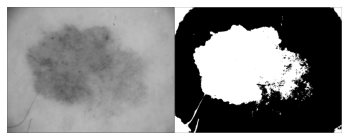

In [7]:
ret2, mask2 = cv2.threshold(im_gray2, t2, 255, cv2.THRESH_BINARY_INV)
viewimg(im_gray2, mask2)

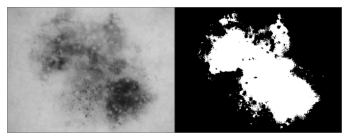

In [8]:
ret3, mask3 = cv2.threshold(im_gray3, t3, 255, cv2.THRESH_BINARY_INV)
viewimg(im_gray3, mask3)

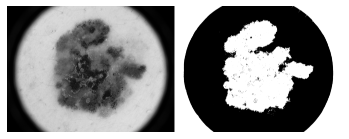

In [9]:
ret4, mask4 = cv2.threshold(im_gray4, t4, 255, cv2.THRESH_BINARY_INV)
viewimg(im_gray4, mask4)

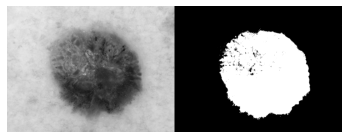

In [10]:
ret5, mask5 = cv2.threshold(im_gray5, t5, 255, cv2.THRESH_BINARY_INV)
viewimg(im_gray5, mask5)

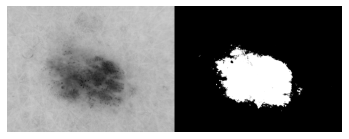

In [11]:
ret6, mask6 = cv2.threshold(im_gray6, t6, 255, cv2.THRESH_BINARY_INV)
viewimg(im_gray6, mask6)

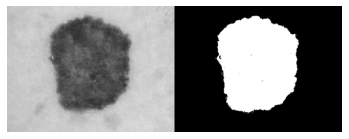

In [12]:
ret7, mask7 = cv2.threshold(im_gray7, t7, 255, cv2.THRESH_BINARY_INV)
viewimg(im_gray7, mask7)

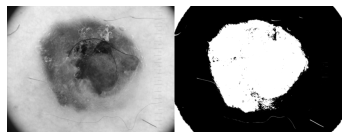

In [13]:
ret8, mask8 = cv2.threshold(im_gray8, t8, 255, cv2.THRESH_BINARY_INV)
viewimg(im_gray8, mask8)

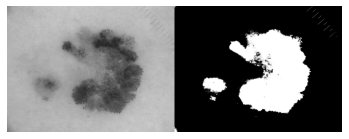

In [14]:
ret9, mask9 = cv2.threshold(im_gray9, t9, 255, cv2.THRESH_BINARY_INV)
viewimg(im_gray9, mask9)

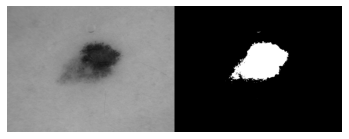

In [15]:
ret10, mask10 = cv2.threshold(im_gray10, t10, 255, cv2.THRESH_BINARY_INV)
viewimg(im_gray10, mask10)

In [16]:
#Compute DICE to compare the similarity of two masks
#Comparison between our pipeline and the reference, between the segmentation method and the ground-truth segmentation

#Definition of the Jaccard Index (JI)
#Provides the similarity between two sets 
#Computed as the size of the intersection divided by the size of the size of the union 
#of the  segmentation mask

def JI (mask1,mask2):
    intersection = np.logical_and(mask1, mask2)
    union = np.logical_or(mask1, mask2)
    J= np.sum(intersection)/np.sum(union)
    return J   

def dice(mask1,mask2):
    J = JI(mask1,mask2)
    DICE = (2*J)/(1+J)
    return DICE


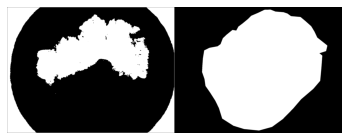

DICE for image 1:  0.5134209823144532


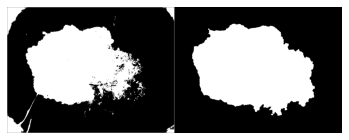

DICE for image 2:  0.8436236464093941


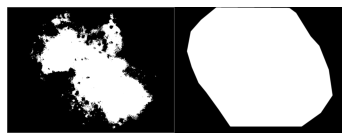

DICE for image 3:  0.5942052940741882


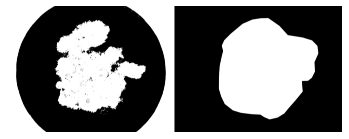

DICE for image 4:  0.5744715554050264


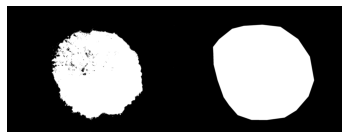

DICE for image 5:  0.8779847726195018


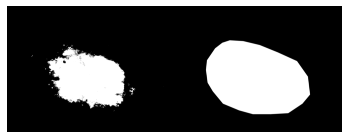

DICE for image 6:  0.7009878098677075


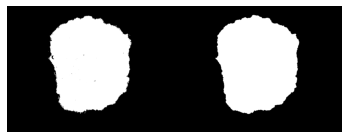

DICE for image 7:  0.9866045254550194


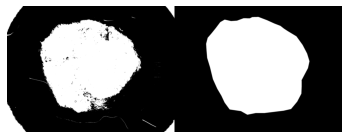

DICE for image 8:  0.8752530381450363


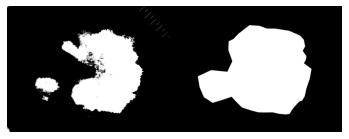

DICE for image 9:  0.7971805809321781


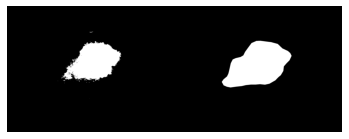

DICE for image 10:  0.8083436896545131


In [17]:
#Computation of the DICE index for the images test 
msk1 = cv2.imread("images_test/msk1.png", cv2.IMREAD_GRAYSCALE)
viewimg(mask1, msk1)
dice1 = dice(mask1,msk1)
print("DICE for image 1: ", dice1)

msk2 = cv2.imread("images_test/msk2.png", cv2.IMREAD_GRAYSCALE)
viewimg(mask2, msk2)
dice2 = dice(mask2,msk2)
print("DICE for image 2: ", dice2)

msk3 = cv2.imread("images_test/msk3.png", cv2.IMREAD_GRAYSCALE)
viewimg(mask3, msk3)
dice3 = dice(mask3,msk3)
print("DICE for image 3: ", dice3)

msk4 = cv2.imread("images_test/msk4.png", cv2.IMREAD_GRAYSCALE)
viewimg(mask4, msk4)
dice4 = dice(mask4,msk4)
print("DICE for image 4: ", dice4)

msk5 = cv2.imread("images_test/msk5.png", cv2.IMREAD_GRAYSCALE)
viewimg(mask5, msk5)
dice5 = dice(mask5,msk5)
print("DICE for image 5: ", dice5)

msk6 = cv2.imread("images_test/msk6.png", cv2.IMREAD_GRAYSCALE)
viewimg(mask6, msk6)
dice6 = dice(mask6,msk6)
print("DICE for image 6: ", dice6)

msk7 = cv2.imread("images_test/msk7.png", cv2.IMREAD_GRAYSCALE)
viewimg(mask7, msk7)
dice7 = dice(mask7,msk7)
print("DICE for image 7: ", dice7)

msk8 = cv2.imread("images_test/msk8.png", cv2.IMREAD_GRAYSCALE)
viewimg(mask8, msk8)
dice8 = dice(mask8,msk8)
print("DICE for image 8: ", dice8)

msk9 = cv2.imread("images_test/msk9.png", cv2.IMREAD_GRAYSCALE)
viewimg(mask9, msk9)
dice9 = dice(mask9,msk9)
print("DICE for image 9: ", dice9)

msk10 = cv2.imread("images_test/msk10.png", cv2.IMREAD_GRAYSCALE)
viewimg(mask10, msk10)
dice10 = dice(mask10,msk10)
print("DICE for image 10: ", dice10)

